# 📘 Text Classification Assignment: Amazon Fine Food Reviews

🧠 Objective
In this assignment, you'll learn how to build a text classification pipeline to predict sentiment (positive or negative) of food reviews. You'll use several classic ML models:

✅ Logistic Regression

✅ Naive Bayes

✅ Support Vector Machine (SVM)

✅ Random Forest

✅ XGBoost



 https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews

## 🥗 📦 Step 1: Load the Dataset



In [1]:
import os
import kagglehub
import pandas as pd

# Download the dataset
path = kagglehub.dataset_download("snap/amazon-fine-food-reviews")
print("📁 Path to dataset files:", path)
print("🗃️ Files in the dataset:", os.listdir(path))



100%|██████████| 242M/242M [00:06<00:00, 38.1MB/s]

Extracting files...


📁 Path to dataset files: /root/.cache/kagglehub/datasets/snap/amazon-fine-food-reviews/versions/2
🗃️ Files in the dataset: ['Reviews.csv', 'database.sqlite', 'hashes.txt']


In [2]:
# Load CSV
csv_file_path = os.path.join(path, "Reviews.csv")
df = pd.read_csv(csv_file_path)
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## 🔍 Step 2: Explore the Data


In [3]:
# Check the dataset shape
print("Shape of the dataset:", df.shape)

# Check for null values
df.isnull().sum()


Shape of the dataset: (568454, 10)


,0
Id,0
ProductId,0
UserId,0
ProfileName,26
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,27
Text,0


## 🛠️ Step 3: Redefine Target as 5-Class

In [4]:
# Keep only necessary columns
df = df[['Text', 'Score']].dropna()

# Filter only scores from 1 to 5
df = df[df['Score'].isin([1, 2, 3, 4, 5])]

# Use Score as label directly (5 classes)
df['Sentiment'] = df['Score'] - 1  # makes it 0 to 4 for sklearn
df['Sentiment'].value_counts().sort_index()


,count
Sentiment,
0,52268
1,29769
2,42640
3,80655
4,363122


## 🧹 Step 4: Text Cleaning and Preprocessing
We'll lowercase the text and remove special characters using regular expressions.

In [7]:
import re
import nltk

# Download stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\\s]', '', text)
    text = re.sub(r'\\s+', ' ', text).strip()
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return text

# Apply cleaning
df['Cleaned_Text'] = df['Text'].apply(preprocess_text)



,Cleaned_Text
0,ihaveboughtseveralofthevitalitycanneddogfoodpr...
1,productarrivedlabeledasjumbosaltedpeanutsthepe...
2,thisisaconfectionthathasbeenaroundafewcenturie...
3,ifyouarelookingforthesecretingredientinrobitus...
4,greattaffyatagreatpricetherewasawideassortment...
...,...
568449,greatforsesamechickenthisisagoodifnotbettertha...
568450,imdisappointedwiththeflavorthechocolatenotesar...
568451,thesestarsaresmallsoyoucangiveofthoseinonetrai...
568452,thesearethebesttreatsfortrainingandrewardingyo...


## ✂️ Step 5: Train/Test Split & TF-IDF Vectorization


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X = df['Cleaned_Text']
y = df['Sentiment']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Vectorize using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


## ⚙️ 🤖 Step 6: Train & Evaluate Models
We'll train and evaluate each model using accuracy and classification report.


In [34]:
from sklearn.metrics import classification_report, accuracy_score

def evaluate_model(model, name):
    model.fit(X_train_vec, y_train)
    y_pred = model.predict(X_test_vec)
    acc = accuracy_score(y_test, y_pred)
    print(f"🔍 {name}")
    print(f"✅ Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))


### 📈 Logistic Regression



In [36]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)
evaluate_model(lr, "Logistic Regression")


🔍 Logistic Regression
✅ Accuracy: 0.6671
              precision    recall  f1-score   support

           0       1.00      0.08      0.14     10454
           1       1.00      0.07      0.14      5954
           2       1.00      0.08      0.15      8528
           3       1.00      0.08      0.15     16131
           4       0.66      1.00      0.79     72624

    accuracy                           0.67    113691
   macro avg       0.93      0.26      0.27    113691
weighted avg       0.78      0.67      0.56    113691



### 📊 Naive Bayes

In [14]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
evaluate_model(nb, "Naive Bayes")


🔍 Naive Bayes
✅ Accuracy: 0.6671
              precision    recall  f1-score   support

           0       1.00      0.08      0.14     10454
           1       1.00      0.07      0.14      5954
           2       1.00      0.08      0.15      8528
           3       1.00      0.08      0.15     16131
           4       0.66      1.00      0.79     72624

    accuracy                           0.67    113691
   macro avg       0.93      0.26      0.27    113691
weighted avg       0.78      0.67      0.56    113691



### ⚙️ Support Vector Machine (SVM)


In [19]:
from sklearn.svm import LinearSVC
svm = LinearSVC()
evaluate_model(svm, "Support Vector Machine")


🔍 Support Vector Machine
✅ Accuracy: 0.6671
              precision    recall  f1-score   support

           0       1.00      0.08      0.14     10454
           1       1.00      0.07      0.14      5954
           2       1.00      0.08      0.15      8528
           3       1.00      0.08      0.15     16131
           4       0.66      1.00      0.79     72624

    accuracy                           0.67    113691
   macro avg       0.93      0.26      0.27    113691
weighted avg       0.78      0.67      0.56    113691



### 🌲 Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
evaluate_model(dt, "Decision Tree")


🔍 Decision Tree
✅ Accuracy: 0.6671
              precision    recall  f1-score   support

           0       1.00      0.08      0.14     10454
           1       1.00      0.08      0.14      5954
           2       1.00      0.08      0.15      8528
           3       1.00      0.08      0.15     16131
           4       0.66      1.00      0.79     72624

    accuracy                           0.67    113691
   macro avg       0.93      0.26      0.27    113691
weighted avg       0.78      0.67      0.56    113691



### 🌲🌲 Random Forest

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
evaluate_model(rf, "Random Forest")


🔍 Random Forest
✅ Accuracy: 0.6671
              precision    recall  f1-score   support

           0       1.00      0.08      0.14     10454
           1       1.00      0.07      0.14      5954
           2       1.00      0.08      0.15      8528
           3       1.00      0.08      0.15     16131
           4       0.66      1.00      0.79     72624

    accuracy                           0.67    113691
   macro avg       0.93      0.26      0.27    113691
weighted avg       0.78      0.67      0.56    113691



### 🚀 XGBoost

In [35]:
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
evaluate_model(xgb, "XGBoost")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:46:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


🔍 XGBoost
✅ Accuracy: 0.6439
              precision    recall  f1-score   support

           0       1.00      0.01      0.03     10454
           1       1.00      0.04      0.08      5954
           2       1.00      0.01      0.02      8528
           3       1.00      0.01      0.01     16131
           4       0.64      1.00      0.78     72624

    accuracy                           0.64    113691
   macro avg       0.93      0.21      0.18    113691
weighted avg       0.77      0.64      0.51    113691



📌 Step 6: Summary & Discussion
You’ve now successfully:


✅ Loaded and cleaned a real-world text dataset

✅ Converted it into a binary sentiment problem

✅ Applied TF-IDF vectorization

✅ Trained and compared five ML models


❓ Reflection Questions
- Which model gave the best performance? Why?

- What would happen if we included Score=3 reviews?

- Could you improve performance with hyperparameter tuning or cross-validation?

- Try using a larger vocabulary (max_features=10000) and compare!



## ⚖️ Optional: Handling Class Imbalance with SMOTE
### 💬 Why SMOTE?

In multi-class problems, some classes (like reviews with 1⭐ or 5⭐) might have way more or fewer examples. This leads to imbalance — the model might perform worse on rare classes.

- SMOTE (Synthetic Minority Over-sampling Technique) helps by:

- Generating synthetic samples for underrepresented classes

- Making the training dataset more balanced

In [37]:
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Apply SMOTE on vectorized training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_vec, y_train)

print("Before SMOTE:", y_train.value_counts().sort_index().to_dict())
print("After SMOTE:", pd.Series(y_train_smote).value_counts().sort_index().to_dict())


Before SMOTE: {0: 41814, 1: 23815, 2: 34112, 3: 64524, 4: 290498}
After SMOTE: {0: 290498, 1: 290498, 2: 290498, 3: 290498, 4: 290498}


### 🔁 Retrain Logistic Regression on Balanced Data



📈 Logistic Regression with SMOTE — Accuracy: 0.6671
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.08      0.14     10454
           1       1.00      0.07      0.14      5954
           2       1.00      0.08      0.15      8528
           3       0.99      0.08      0.15     16131
           4       0.66      1.00      0.79     72624

    accuracy                           0.67    113691
   macro avg       0.93      0.26      0.27    113691
weighted avg       0.78      0.67      0.56    113691



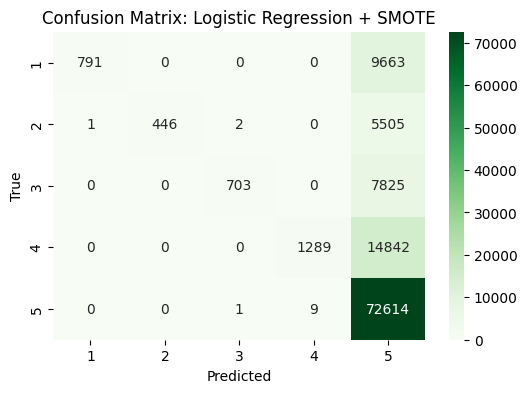

In [38]:
from sklearn.metrics import confusion_matrix

# Train Logistic Regression on SMOTE-balanced data
lr_smote = LogisticRegression(max_iter=1000)
lr_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = lr_smote.predict(X_test_vec)

# Evaluate
acc = accuracy_score(y_test, y_pred_smote)
print(f"📈 Logistic Regression with SMOTE — Accuracy: {acc:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_smote))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_smote)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=[1,2,3,4,5], yticklabels=[1,2,3,4,5])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix: Logistic Regression + SMOTE')
plt.show()


## 🧪 Logistic Regression with Class Weights

📈 Logistic Regression (Balanced Weights) — Accuracy: 0.6671
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.08      0.14     10454
           1       0.99      0.07      0.14      5954
           2       1.00      0.08      0.15      8528
           3       0.99      0.08      0.15     16131
           4       0.66      1.00      0.79     72624

    accuracy                           0.67    113691
   macro avg       0.93      0.26      0.27    113691
weighted avg       0.78      0.67      0.56    113691



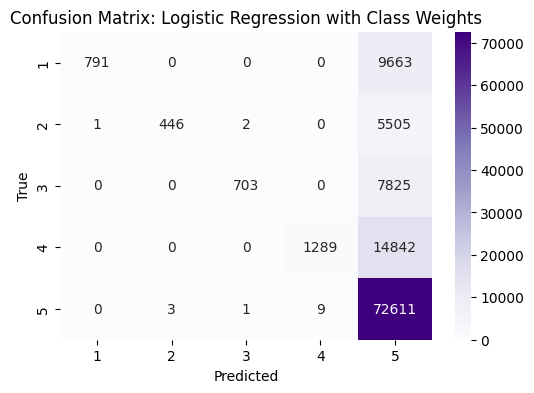

In [39]:
# Initialize Logistic Regression with class_weight='balanced'
lr_weighted = LogisticRegression(max_iter=1000, class_weight='balanced')

# Train the model
lr_weighted.fit(X_train_vec, y_train)
y_pred_weighted = lr_weighted.predict(X_test_vec)

# Evaluate
acc = accuracy_score(y_test, y_pred_weighted)
print(f"📈 Logistic Regression (Balanced Weights) — Accuracy: {acc:.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_weighted))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_weighted)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=[1, 2, 3, 4, 5], yticklabels=[1, 2, 3, 4, 5])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix: Logistic Regression with Class Weights')
plt.show()
